<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Colab-DogCat-CNN/blob/main/2Value_CNN_System_of_Sine_Wave_Cut_Judge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 本程式使用CNN二值一維卷積算法,用於分析訊號是否中斷量測之Sin波模擬驗證

在CNN系統中資料量弱過少會難以萃取有效特徵，故暫定CNN採用多層二值分類。

目前目標物採用時序1維訊號,故CNN採用一維卷積神經網路的特徵萃取。

在訊號是否中斷判斷上用於第一步判斷，概觀如下之紅色虛框部分。

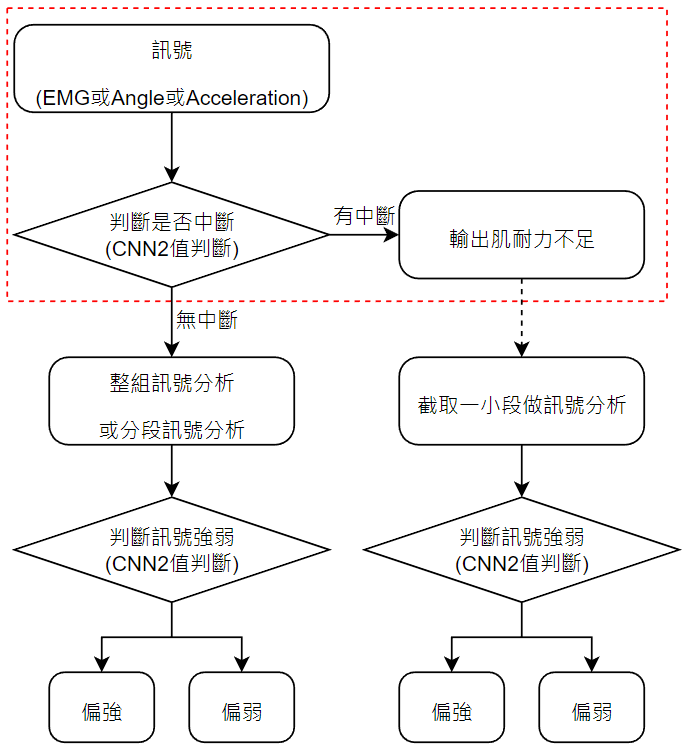

In [ ]:
#讀雲端資料存取方法
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Main路徑測試
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷

'2Value CNN System of Sine Wave Cut Judge.ipynb'   test1   train


# 強訊號1D資料模擬

▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼


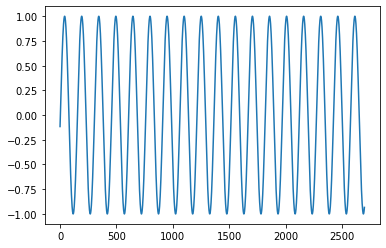

▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼


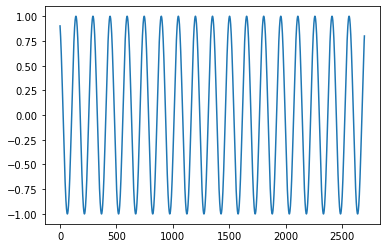

▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼


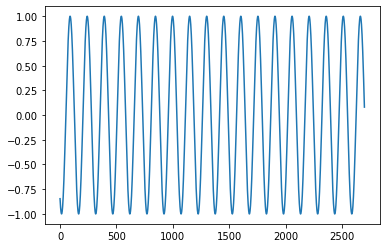

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=0

for i in range(0,3,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/train/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

## 強訊號卻中斷的訊號模擬

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


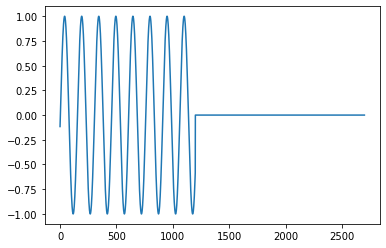

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


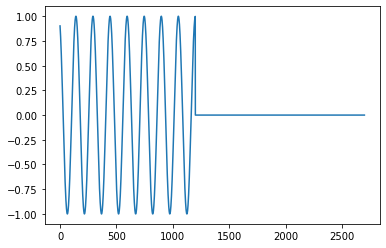

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


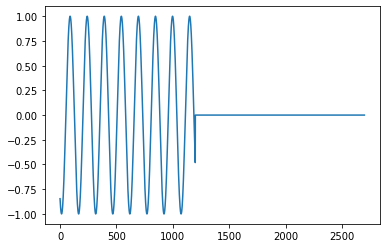

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


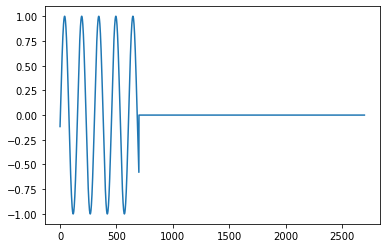

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


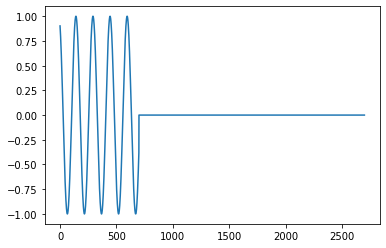

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


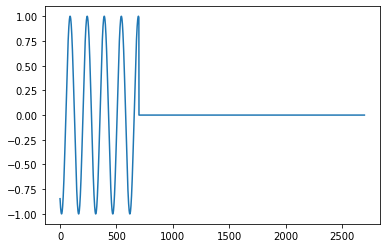

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz 中斷訊號)
import numpy as np
from matplotlib import pyplot as plt

Lv=1

for i in range(0,6,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==3:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==4:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==5:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/train/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)
  

# 弱訊號1D資料模擬

▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼


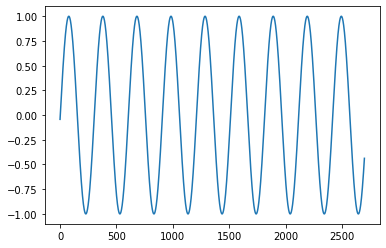

▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼


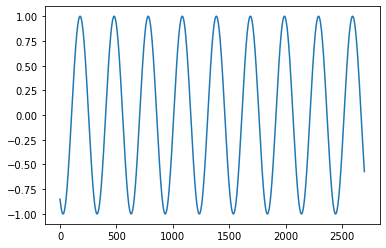

▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼


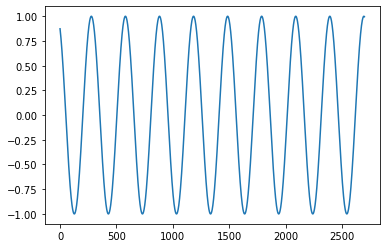

In [ ]:
#sin波形(模擬訊號偏弱的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=0

for i in range(0,3,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()
  
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/train/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

## 弱訊號卻中斷的訊號模擬

▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼


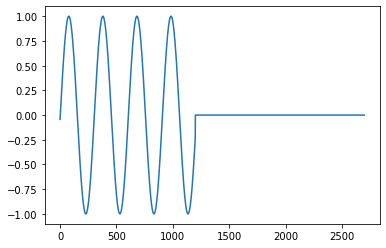

▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼


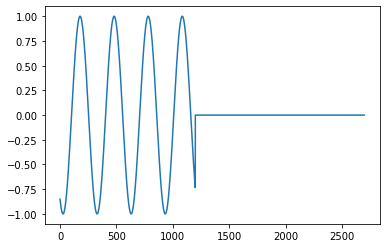

▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼


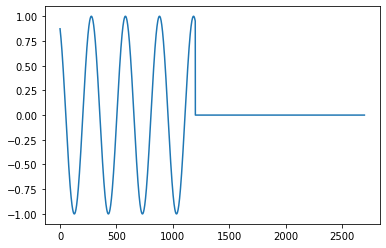

▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼


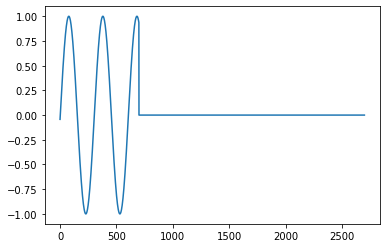

▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼


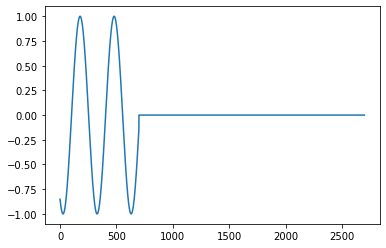

▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼


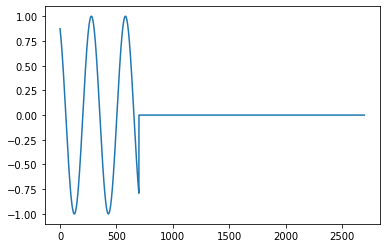

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=1

for i in range(6,12,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==6:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==7:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==8:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==9:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==10:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==11:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/train/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

# CNN方法

## 訓練

In [ ]:
#讀檔測試
import numpy as np
import cv2
import os

train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/train'
path = os.path.join(train_dir)
X_train = []
y_train = []

def Lv_convert(get_category):#訓練陣列指引
  if get_category=='Lv0':
    return 0
  elif get_category=='Lv1':
    return 1

def create_train_data(path):#輸出訓練陣列
    for p in os.listdir(path):
        #print(os.path.join(path,p))
        category = p.split(".")[0]
        category = Lv_convert(category)
        img_array = np.load(os.path.join(path,p))
        #print(img_array)
        X_train.append(img_array)
        y_train.append(category)

create_train_data(path)
X_train = np.array(X_train).reshape(-1, 2700, 1)
y_train = np.array(y_train)
print('訓練資料集維度=',X_train.shape)
print('分級資料=',y_train)
#X_train = X_train/255.0

訓練資料集維度= (16, 2700, 1)
分級資料= [0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1]


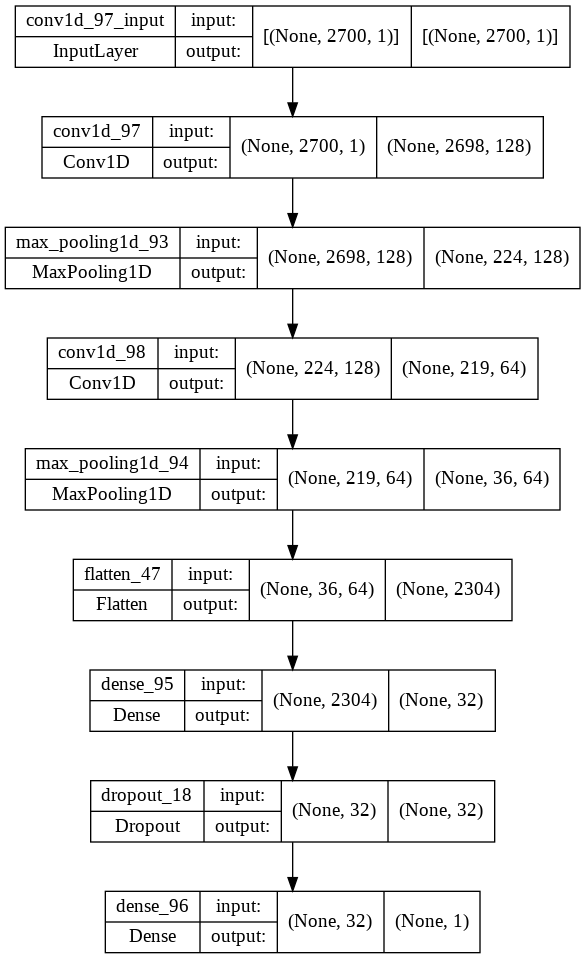

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

CNN=keras.Sequential(name='SinWaveCNN')
CNN.add(layers.Conv1D(128,3,1,activation='relu',input_shape=(2700,1)))#第一層需有input_shape
CNN.add(layers.MaxPooling1D(pool_size=12))
CNN.add(layers.Conv1D(64,6,1,activation='relu'))
CNN.add(layers.MaxPooling1D(pool_size=6))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(32,activation='relu'))
CNN.add(layers.Dropout(0.5))
#CNN.add(layers.Dense(2,activation='softmax'))#0~1(2 layer)
CNN.add(layers.Dense(1, activation='sigmoid'))

keras.utils.plot_model(CNN,show_shapes=True)

In [ ]:
CNN.compile(optimizer='Adam',
      loss=keras.losses.binary_crossentropy,  #binary_crossentropy(二值用) or sparse_categorical_crossentropy(N值用)
      metrics=['accuracy'])

In [ ]:
#訓練了第5次
CNN.fit(X_train, y_train, epochs=5, batch_size=32)
print(CNN.summary())

Epoch 1/5
1/1 [==============================] - 1s 767ms/step - loss: 0.6884 - accuracy: 0.6875
Epoch 2/5
1/1 [==============================] - 0s 92ms/step - loss: 0.6419 - accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 0s 98ms/step - loss: 0.6080 - accuracy: 0.8750
Epoch 4/5
1/1 [==============================] - 0s 85ms/step - loss: 0.4829 - accuracy: 0.9375
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 0.4348 - accuracy: 0.9375
Model: "SinWaveCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_97 (Conv1D)          (None, 2698, 128)         512       
                                                                 
 max_pooling1d_93 (MaxPoolin  (None, 224, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_98 (Conv1D)          (None, 2

## 測試

In [264]:
#測試數據
import pandas as pd 
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/test1'
path = os.path.join(train_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
  for p in os.listdir(path):
    id_line.append(p.split(".")[0])
    img_array = np.load(os.path.join(path,p))
    #print(img_array.shape)
    X_test.append(img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1, 2700, 1)
#X_test = X_test/255
predictions = CNN.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, '判斷':predicted_val})
print(submission_df)
print('0=無中斷;1=有中斷')

   id  判斷
0  T1   0
1  T3   1
2  T4   1
3  T2   0
0=無中斷;1=有中斷


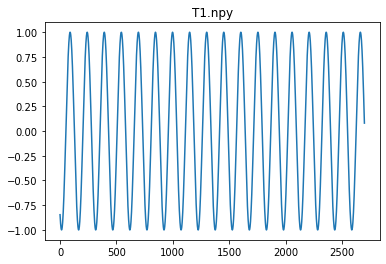

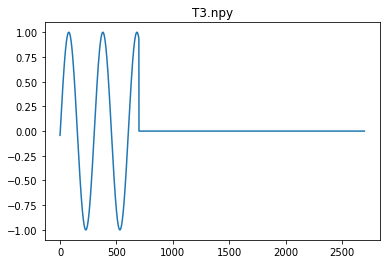

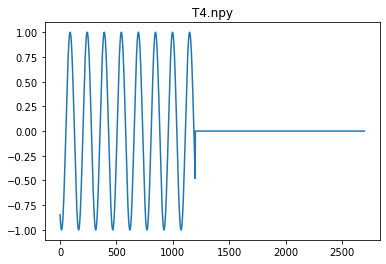

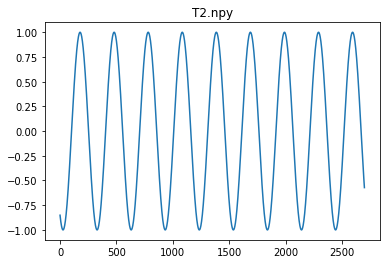

In [ ]:
from numpy.lib.type_check import imag
#讀取測試用圖片
import cv2
import numpy as np
import matplotlib.pyplot as plt
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220713Sin波中斷判斷/test1'
path = os.path.join(train_dir)

for p in os.listdir(path):
  id_line.append(p.split(".")[0])
  img = np.load(os.path.join(path,p))
  #print(img.shape)
  plt.plot(img.T)
  plt.title(p)
  plt.show()

# 小結:判斷能力非常不錯；但也可能是因為模擬訊號比較單純的，或是測試資料量太少驗證不出可信度。